In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


## 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data. 

In [2]:
df_iris = data('iris')

In [4]:
# see the doc string for the data set
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

- print the first 3 rows


In [5]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns


In [101]:
df_iris.shape

(150, 5)

- print the column names

In [7]:
df_iris.columns

# or create a list of column names 
df_iris.columns.tolist()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

- print the data type of each column

In [12]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables

In [109]:
stats = df_iris.describe().T
# .T transposes the summary stats table

In [110]:
# add a range col and calculate range for each variable
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


In [111]:
# get only columns of interest from desc stats
stats[['mean', 'std', '50%', 'max', 'range']]

,mean,std,50%,max,range
Sepal.Length,5.843333,0.828066,5.80,7.9,3.6
Sepal.Width,3.057333,0.435866,3.00,4.4,2.4
Petal.Length,3.758000,1.765298,4.35,6.9,5.9
Petal.Width,1.199333,0.762238,1.30,2.5,2.4


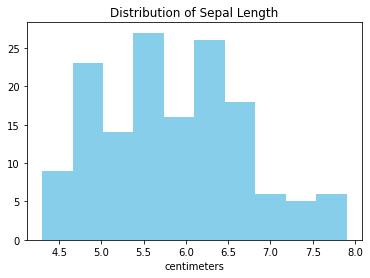

In [119]:
# visualize the variable distributions 

df_iris['Sepal.Length'].hist(color = 'skyblue')
plt.title ('Distribution of Sepal Length')
plt.xlabel ('centimeters')

# Hide gridlines 
plt.grid(False)

plt.show()

- Would you recommend rescaling the data based on these statistics?

No because all numbers in desc stats are real numbers. There is not a huge range between the different variables and they are all in the same units of cm.

## 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [11]:
df_excel = pd.read_excel('Excel_Exercises_.xlsx', sheet_name='Table1_CustDetails')
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

- assign the first 100 rows to a new dataframe, df_excel_sample

In [12]:
df_excel_sample = df_excel.head(100)

- print the number of rows of your original dataframe

In [13]:
df_excel.shape[0]

7049

- print the first 5 column names

In [14]:
list(df_excel.columns[:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

- print the column names that have a data type of object

In [15]:
df_excel.select_dtypes(include='object').head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


In [17]:
# to get just col names
df_excel.select_dtypes(include = 'object').columns.to_list()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

- compute the range for each of the numeric variables.

In [121]:
stats = df_excel.describe().T.head()
stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.00,0.00,0.00,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.00,1.00,2.00,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.00,1.00,2.00,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.00,0.00,1.00,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.45,70.35,89.85,118.75


In [123]:
# add range col and compute range
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.00,0.00,0.00,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.00,1.00,2.00,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.00,1.00,2.00,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.00,0.00,1.00,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.45,70.35,89.85,118.75,100.5


# 3. Read the data from this google sheet into a dataframe, df_google

In [20]:
# Assign Google Sheet share url to a variable.
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [21]:
# Use the replace method to modify Google Sheet share url to be a csv export url.
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [22]:
# Use read_csv() method to create our DataFrame.

df_google = pd.read_csv(csv_export_url)

- print the first 3 rows

In [23]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [24]:
df_google.shape

(891, 12)

- print the column names

In [25]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

- print the data type of each column

In [64]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# or to get a bit more info about null values
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- print the summary statistics for each of the numeric variables

In [65]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- print the unique values for each of your categorical variables

In [128]:
# create a for loop to only output number of values for columns with string dtypes
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values')

Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [126]:
# value counts with dropna False will show the count of nan values 
df_google['Sex'].value_counts(dropna =False)

male      577
female    314
Name: Sex, dtype: int64

In [127]:
df_google['Embarked'].value_counts(dropna =False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [129]:
# shows the count of all variables
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [97]:
titanic_df = acquire.get_titanic_data()

In [98]:
titanic_df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [94]:
iris_df = acquire.get_iris_data()

In [95]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [96]:
iris_df.shape

(150, 7)

In [97]:
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])

In [98]:
iris_df = iris_df.rename(columns={"species_name": "species"})

In [99]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
iris_df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [102]:
dummy_df = pd.get_dummies(iris_df['species'], dummy_na = False, drop_first = True)

In [103]:
dummy_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [104]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   versicolor  150 non-null    uint8
 1   virginica   150 non-null    uint8
dtypes: uint8(2)
memory usage: 428.0 bytes


In [105]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [106]:
iris_df = pd.concat([iris_df, dummy_df], axis = 1)

In [107]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [108]:
iris_df.shape

(150, 7)

In [92]:
# added to prepare script
# def prep_iris_data(df):
#     '''
#     takes in a dataframe of the iris dataset as it is acquired and returns a cleaned dataframe
#     argument: df: a pandas df with expected feature names and columns
#     return: train, test, split: three dataframes with the cleanining operations performed on them
#     '''
#     iris_df = df.drop_duplicates()
#     iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
#     iris_df = iris_df.rename(columns={"species_name": "species"})
#     train, test = train_test_split(iris_df, test_size= 0.2, random_state= 1349, stratify = iris_df.species)
#     train, validate = train_test_split(train, train_size= 0.7, random_state=1349, stratify = train.species)
#     dummy_train = pd.get_dummies(train[['species']], drop_first= True)
#     dummy_validate = pd.get_dummies(validate[['species']], drop_first= True)
#     dummy_test = pd.get_dummies(test[['species']], drop_first= True)
#     train = pd.concat([train, dummy_train], axis = 1)
#     validate = pd.concat([validate, dummy_validate], axis = 1)
#     test = pd.concat([test, dummy_test], axis = 1)
#     train = train.drop(columns = ['species'])
#     validate = validate.drop(columns = ['species'])
#     test = test.drop(columns = ['species'])
#     return train, validate, test